## Moving Average and Exponential Smoothing in Python

### Loading the required packages beforehand

- **Numpy and Pandas** are for handling the data and make required modifications to it
- **Matplotlib** assists us in Visualizing our results and for EDA
- **Statsmodels** contains numerous statistical functions and specially it's ts module will be mostly used for Time Series Analysis

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime
from collections import OrderedDict
import matplotlib.pyplot as plt 

## Importing the data: International Airline Passengers

In [6]:
df=pd.read_csv("iairpass.csv",index_col='Month',parse_dates=True)

In [7]:
df.head()

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### This is how the Time Series looks like:

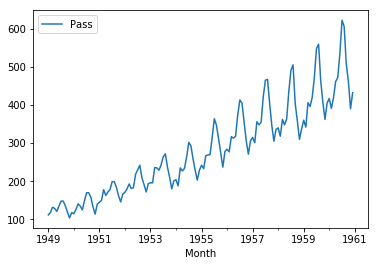

In [9]:
df.plot();

In [10]:
#Observing the shape of the dataframe
df.shape

(144, 1)

### Dividing the dataset into training and test sets:

In [11]:
train=df[:120]
test=df[120:]

### Let’s visualize the data (train and test together) to know how it varies over a time period.

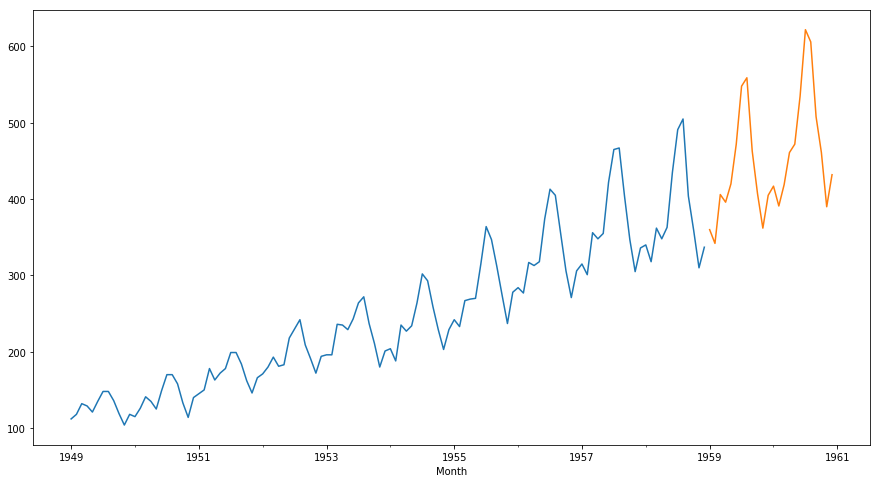

In [13]:
train["Pass"].plot(figsize=(15,8))
test["Pass"].plot(figsize=(15,8))
plt.show()

## Simple Average Method
### Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.We take all the values previously known, calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.

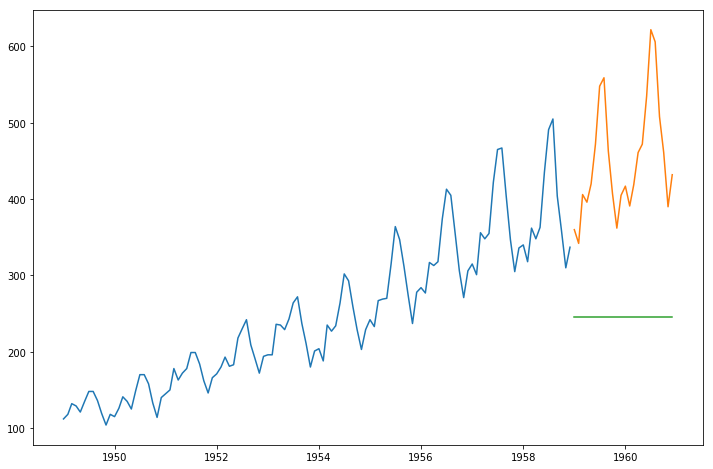

In [17]:
avg = test.copy()
avg['avg_forecast'] = train['Pass'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Pass'], label='Train')
plt.plot(test['Pass'], label='Test')
plt.plot(avg['avg_forecast'], label='Average Forecast')
plt.show()

## Moving Average Method

### Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values.

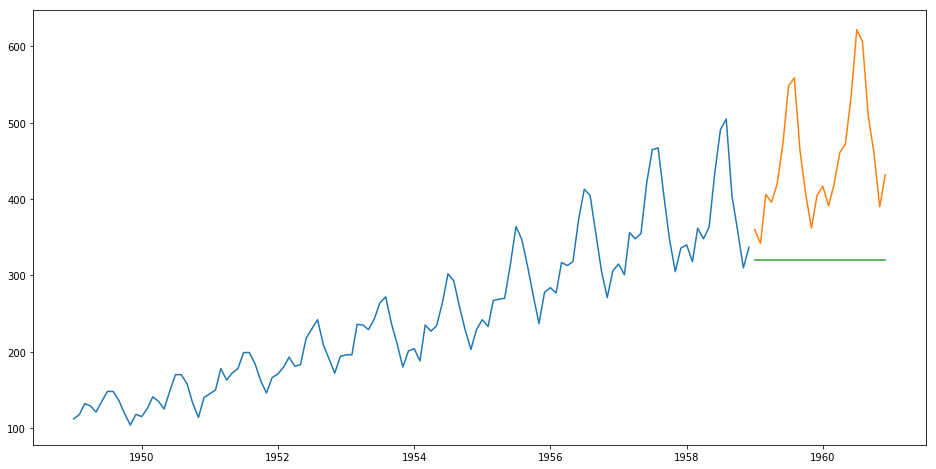

In [18]:
mov_avg = test.copy()
mov_avg['moving_avg_forecast'] = train['Pass'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Pass'], label='Train')
plt.plot(test['Pass'], label='Test')
plt.plot(mov_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.show()

## Simple Exponential Smoothing

### It may be sensible to attach larger weights to more recent observations than to observations from the distant past. The technique which works on this principle is called Simple exponential smoothing. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations

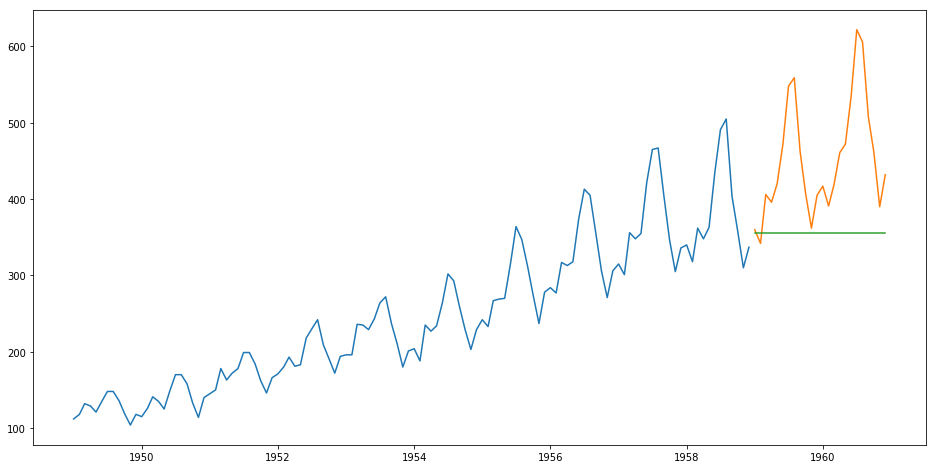

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
exp_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Pass'])).fit(smoothing_level=0.4,optimized=False)

exp_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Pass'], label='Train')
plt.plot(test['Pass'], label='Test')
plt.plot(exp_avg['SES'], label='SES')
plt.show()

### Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual

<Figure size 1440x576 with 0 Axes>

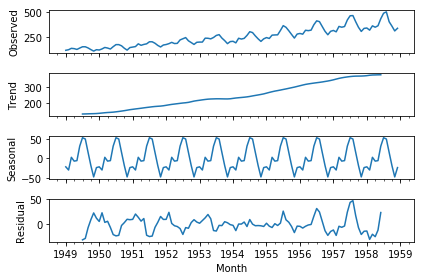

In [22]:
plt.figure(figsize=(20,8))
sm.tsa.seasonal_decompose(train["Pass"]).plot();
#result = sm.tsa.stattools.adfuller(train["Number of passengers in thousands"])
plt.show();

#### If we use any of the above methods, it won’t take into account this trend. Trend is the general pattern of prices that we observe over a period of time. In this case we can see that there is an increasing trend.

#### Although each one of these methods can be applied to the trend as well. E.g. the Naive method would assume that trend between last two points is going to stay the same, or we could average all slopes between all points to get an average trend, use a moving trend average or apply exponential smoothing.

#### But we need a method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.

### Let us forecast using Holt's Linear Trend Method:

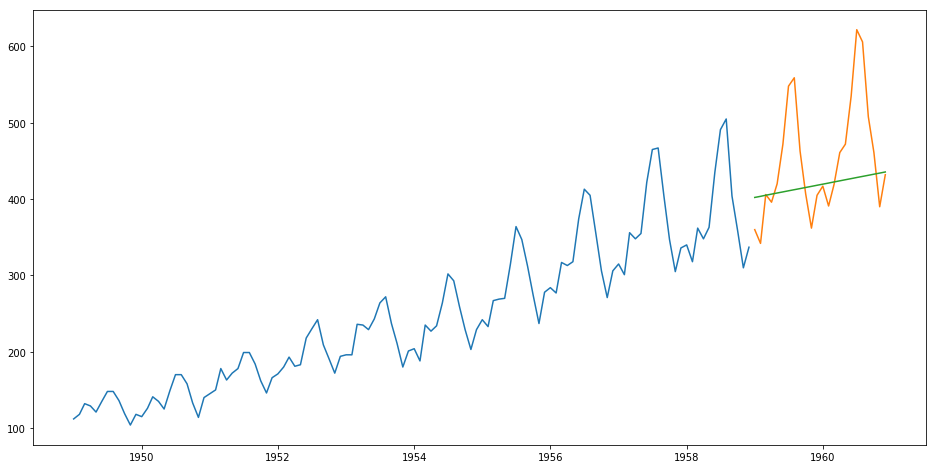

In [23]:
y_hlt = test.copy()

fit1 = Holt(np.asarray(train['Pass'])).fit(smoothing_level = 0.1,smoothing_slope = 0.1)
y_hlt['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Pass'], label='Train')
plt.plot(test['Pass'], label='Test')
plt.plot(y_hlt['Holt_linear'], label='Holt_linear')
plt.show()

#### The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

#### In this method also, we can implement both additive and multiplicative technique. The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.

### Let us forecast using Holt's Winter Method:

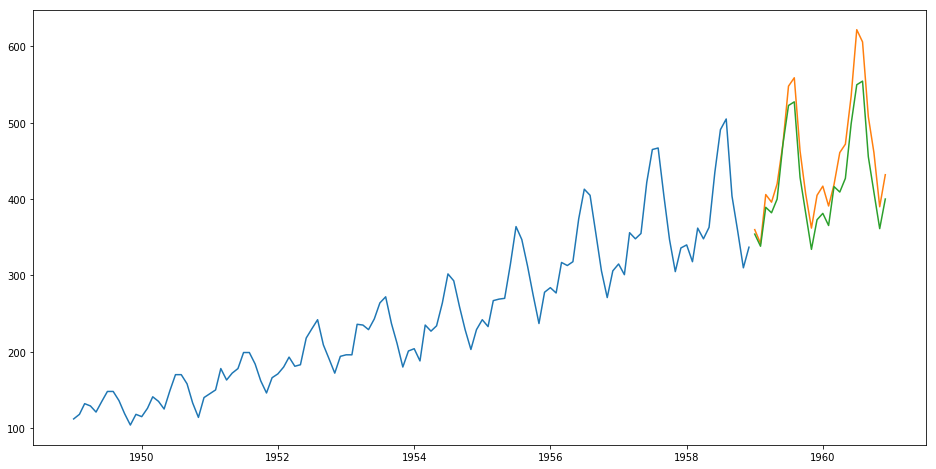

In [24]:
y_hwt = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Pass']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hwt['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Pass'], label='Train')
plt.plot(test['Pass'], label='Test')
plt.plot(y_hwt['Holt_Winter'], label='Holt_Winter')
plt.show()

### And that's it, we see, when each of ETS method is used and in which scenario!